# EDA: Diagnosing Diabetes

## Introduction
This project explores EDA to inspect, clean, and validate a data set, specifically data that looks at how certain diagnostic factors affect the diabetes outcome of women patients.

NOTE: This project is based on [Codecademy EDA](https://www.codecademy.com/courses/eda-exploratory-data-analysis-python/projects/data-cleaning-project). 

## Data Set

**Note**: This [dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database) is from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains the following columns:

- `Pregnancies`: Number of times pregnant
- `Glucose`: Plasma glucose concentration per 2 hours in an oral glucose tolerance test
- `BloodPressure`: Diastolic blood pressure
- `SkinThickness`: Triceps skinfold thickness
- `Insulin`: 2-Hour serum insulin
- `BMI`: Body mass index
- `DiabetesPedigreeFunction`: Diabetes pedigree function
- `Age`: Age (years)
- `Outcome`: Class variable (0 or 1)

## Set Up

In [147]:
import pandas as pd
import numpy as np
import seaborn as sns

In [148]:
data = pd.read_csv("diabetes.csv")

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Initial Inspection
Initial inspection consists of preliminary analysis of what kind of columns (i.e. precursors to features for an ML model) exist, numbers of columns and observations, datatypes etc. 
Note that this can be done both manually, and summarized via `.info()`

In [149]:
# look at rows and columns
num_rows = len(data)
cols = data.columns.to_list()
num_cols = len(cols)

print(f"There are {num_rows} observations, and {num_cols} columns: ")
print(cols)

There are 768 observations, and 9 columns: 
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [150]:
# look at datatypes
print("The datatypes of each column are: ")
print(data.dtypes)

The datatypes of each column are: 
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                      object
dtype: object


In [151]:
# find whether columns contain null values
print("Null values present: ")
print(data.isna().any())

Null values present: 
Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


In [152]:
# ONE-LINE ALTERNATIVE TO THE ABOVE
# get summary information about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


The datatypes for all columns execept Outcome seems reasonable, and it appears there are no non-null values. Column names are descriptive. It would be necessary to turn Outcome into an int value as well, before it can be used as a target variable. 

In [153]:
# perform summary statistics
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Looking at the summary statistics, the following is observed:
* columns Glucose, BloodPressure, SkinThickness, Insulin, and BMI all have min value = 0; this indicates that data is likely missing for some observations, as a value of 0 is nonsensical within the context
* the maximum values across column are quite large in comparison to mean+3std (assuming normal distribution) and the 75th percentile: this indicates there may be outlier observations which could skew further analysis or modelling

Overall, further deeper analysis and investigation is necessary.

## Further Analysis

Further analysis includes getting a more accurate view of the missing values, and datatype anomalies. 

### Missing Values
The nonsensical 0's are replaced with nan to represent missing values. 

In [154]:
# replace instances of 0 with NaN
for c in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    data[c] = data[c].replace(0, np.nan)

print("The number of 'missing' values in each column is: ")
print(data.isna().sum())

The number of 'missing' values in each column is: 
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [155]:
# print rows with missing values
print(data[data.isnull().any(axis=1)])

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      NaN  33.6   
1              1     85.0           66.0           29.0      NaN  26.6   
2              8    183.0           64.0            NaN      NaN  23.3   
5              5    116.0           74.0            NaN      NaN  25.6   
7             10    115.0            NaN            NaN      NaN  35.3   
..           ...      ...            ...            ...      ...   ...   
761            9    170.0           74.0           31.0      NaN  44.0   
762            9     89.0           62.0            NaN      NaN  22.5   
764            2    122.0           70.0           27.0      NaN  36.8   
766            1    126.0           60.0            NaN      NaN  30.1   
767            1     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age Outcome  
0                       0.627   50       1  
1                    

Most of the rows with a missing value actually have multiple missing values. SkinThickness and Insulin have a large number of missing values (30% and 50% of all observations respectively), which may be difficult to impute. 

### Datatype cleaning
The Outcome column seems like it should be an int datatype, but is rather an object datatype. Its values will be investigated and potentially cleaned. 

In [156]:
# print unique values of Outcome column
print(data["Outcome"].unique())

['1' '0' 'O']


Some entries which were meant to be 0 were incorrectly entered as 'O'. This can be replaced. As well, the column should be converted to an int datatype

In [157]:
# replace O with 0, convert to int
data["Outcome"] = data["Outcome"].replace("O", 0).astype("int")

print(data["Outcome"].unique()) # verify that replacement was successful

[1 0]


## Visualization
Now that the data is better understood, it will be visualized with paired plots to see distributions and understand relationships to begin to think about modelling and prediction. 

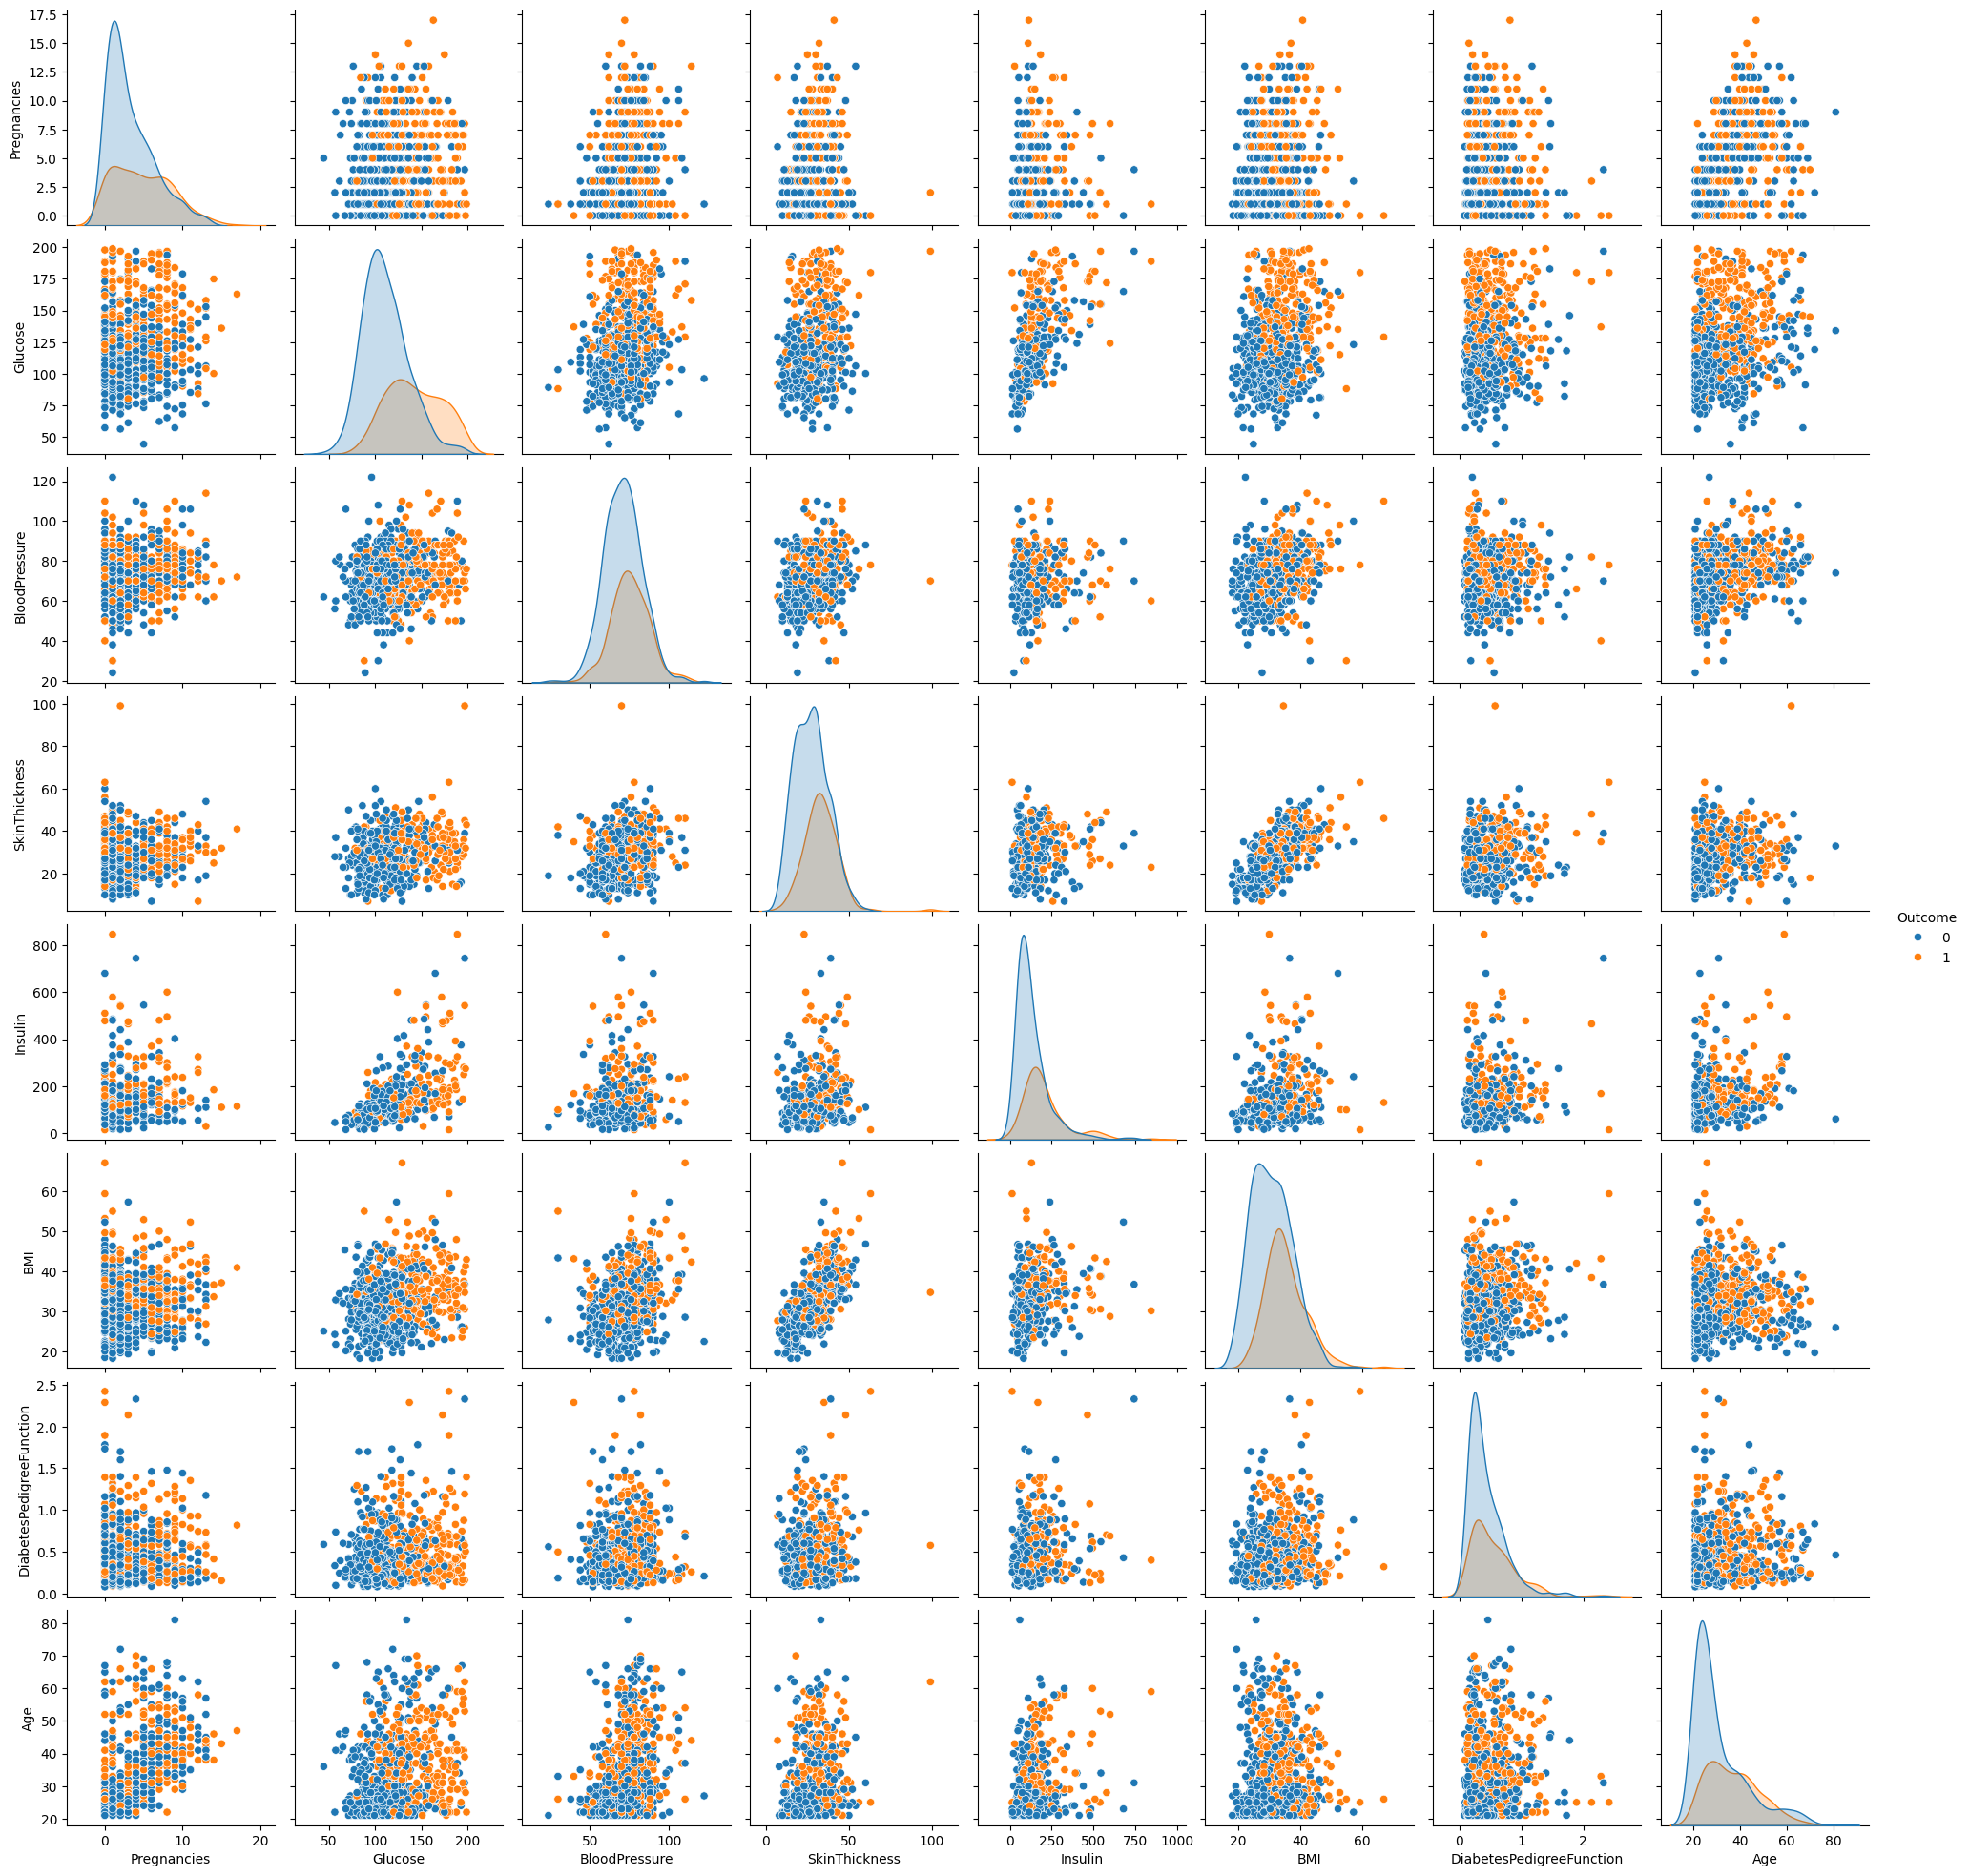

In [158]:
sns.pairplot(data, hue="Outcome") # paired plots of all columns, coloured by the Outcome column

As can be seen from the pair plots, some relationships start to emerge between columns (e.g. potentially linear relationship between SkinThickness and BMI) and clustering can be seen within each column based on the Outcome column (in the diagonal distribution plots). A hypothesis starts to form that some of these columns may have predictive capabilities for the Outcome. 

## Conclusions and Next Steps
This dataset was analyzed both qualitatively and quantitatively. Further exploratory data analysis steps could be to create box plots of the discrete data (e.g. Pregnancies), and consider imputing some of the missing values with e.g. the mean or median of the column. This would work well for columns with few missing columns, but may be less accurate for columns with many missing values. 

Furthermore, a machine learning model can be generated to predict the Outcome based on other columns, potentially using logistic regression. 